Consider the ODE
$$\begin{align}
\frac{dz(t)}{dt}=exp(-3t)+t^2-\frac{1}{2}z(t)
\end{align}$$
Solve the ODE until $t=t_{max}=1$, given that $z(0)=2.5$

# Question 3
What is $z(t_{max}=1)$ for the implicit trapezoid method for $\Delta t=0.001$?

The implicit trapezoid method for the ODE $\dot y(t)=g(t,y(t))$ is
$$
y_{i+1}\approx y_i +\frac{\Delta t}{2}\left(g(t_i,y_i)+g(t_{i+1},y_{i+1})\right)
$$

For the ODE in equation 1, substitution gives
$$
z_{i+1}\approx z_i+\frac{\Delta t}{2}\left[\left(exp(-3t_i)+t_i^2-\frac{1}{2}z_i\right) + \left(exp(-3t_{i+1})+t_{i+1}^2-\frac{1}{2}z_{i+1}\right)\right]
$$

After rearranging to isolate $z_{i+1}$ on the LHS we get
$$
z_{i+1}\approx \frac{z_i+\frac{\Delta t}{2}\left[\left(exp(-3t_i)+t_i^2-\frac{1}{2}z_i\right)+\left(exp(-3t_{i+1})+t_{i+1}^2\right)\right]}{\left(1+\frac{\Delta t}{4}\right)}
$$

In [42]:
import numpy as np

def trapezoid(t,dt):
    z = np.zeros(t.shape[0]) # define z-space
    z[0] = 2.5 # boundary condition
    for n in range(t.shape[0]-1): # iterate over whole time interval
        z[n+1]= np.exp(-3.0*t[n])+pow(t[n],2.0)-(0.5*z[n])
        z[n+1] += np.exp(-3.0*t[n])+pow(t[n],2.0)
        z[n+1] *= 0.5*dt
        z[n+1] += z[n]
        z[n+1] /= 1.0+(0.25*dt)
    return z

dt = 0.001
t = np.arange(0,1+dt,dt)
t,trapezoid(t,dt)

(array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 array([2.5       , 2.49975006, 2.49949726, ..., 2.03438212, 2.03441101,
        2.03444174]))

Plot the integrated function

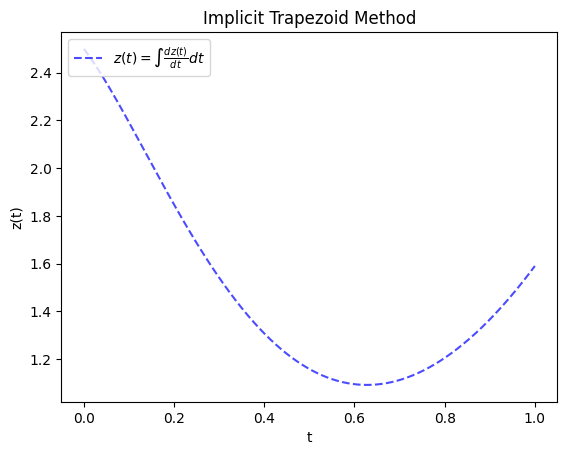

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
dt = 0.01
ax.plot(t, trapezoid(t,dt), color="b", alpha=0.7, linestyle='--', label=r'$z(t)=\int \frac{dz(t)}{dt} dt$')
#ax.plot(t, Y(t), color="b", alpha=0.7, linestyle='--', label=r'$y(t)=exp(-at)(y(0)+\frac{b}{a^2}+\frac{bt}{a}-\frac{b}{a^2}$')
ax.set_title('Implicit Trapezoid Method')
ax.set_xlabel('t')
ax.set_ylabel('z(t)')
ax.legend(loc="upper left")